In [1]:
import os
os.chdir('../')

In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import contextily as cx

In [3]:
gadm_1_v = pd.read_csv("combined_dataset/GADM_1_variables.csv")
gadm_1_geo = gpd.read_file("combined_dataset/GADM_1_geometries.gpkg")
gadm_1 = gadm_1_geo.merge(gpd.GeoDataFrame(gadm_1_v), on='GID_1', how='inner')

In [4]:
gadm_1.COUNTRY.unique().tolist()

['Senegal',
 'Ghana',
 'Angola',
 'Benin',
 'Cameroon',
 'Republic of the Congo',
 'Algeria',
 'Ethiopia',
 'Kenya',
 'Madagascar',
 'Malawi',
 'Zimbabwe',
 'Zambia',
 'South Africa',
 'Uganda',
 'Tanzania',
 'Tunisia',
 'Togo',
 'Chad',
 'Swaziland',
 'Sierra Leone',
 'Rwanda',
 'Nigeria',
 'Niger',
 'Namibia',
 'Mauritius',
 'Mauritania',
 'Mozambique',
 'Mali',
 'Morocco',
 'Lesotho',
 'Libya',
 'Liberia',
 'Equatorial Guinea',
 'Guinea-Bissau',
 'Gambia',
 'Guinea',
 'Gabon',
 'Eritrea',
 'Egypt',
 'Democratic Republic of the Congo',
 "Côte d'Ivoire",
 'Central African Republic',
 'Botswana',
 'Burkina Faso',
 'Burundi']

In [10]:
gadm_1['ISO_1']

0      SN-DK
1      SN-DB
2      SN-FK
3      SN-KA
4      SN-KL
       ...  
437      NaN
438    BI-MW
439    BI-NG
440    BI-RT
441    BI-RY
Name: ISO_1, Length: 442, dtype: object

### SCI generated features

In [8]:
sci = pd.read_csv("external_dataset/sci_indices.csv")

In [36]:
sci.head()

,Unnamed: 0,user_loc,Mean_friendship,Median_friendship,Std_friendship,Total_friendship,Mean_SCI_with_Self,Median_SCI_with_Self,Std_SCI_with_Self,SCI,...,Median_dist_to_SCI_km,Std_dist_to_SCI_km,Total_dist_to_SCI_km,Ratio_selfloop_to_country,Ratio_selfloop_to_africa,Ratio_selfloop_to_all_sci,Average_distance_of_friendships_km,Ratio_SCI_low_hi_africa,Ratio_SCI_middle_hi_africa,Ratio_SCI_high_hi_africa
0,0,AGO1,28899.495775,410.0,509712.459518,20518642,2610.911879,18.0,152077.386439,20858575,...,2646.321290,1312.957507,2.128233e+06,0.688941,0.658272,0.647544,293.647092,0.984887,0.004676,0.003234
1,1,AGO10,22421.997183,516.5,262283.088466,15919618,2021.547252,15.0,78400.334324,16150141,...,2903.577708,1484.526956,2.358258e+06,0.444649,0.417176,0.411221,521.316599,0.987414,0.005971,0.002784
2,2,AGO11,10280.314085,415.5,58056.367014,7299023,949.510076,17.0,17544.896216,7585636,...,2668.849987,1301.448568,2.138372e+06,0.067579,0.059685,0.057430,715.838866,0.966532,0.011181,0.007536
3,3,AGO12,44556.985915,659.5,831901.941286,31635460,3992.608211,17.0,248166.533095,31896947,...,2437.960731,1443.399100,2.056128e+06,0.725970,0.693085,0.687403,384.683237,0.992178,0.003274,0.001816
4,4,AGO13,42086.776056,561.0,744150.032090,29881611,3769.506822,14.0,222022.468802,30114590,...,2454.309521,1524.129843,2.107170e+06,0.675674,0.652822,0.647771,373.235539,0.993111,0.003384,0.001527


In [9]:
[d for d in sci.user_loc if "GHA" in d]

['GHA1',
 'GHA10',
 'GHA2',
 'GHA3',
 'GHA4',
 'GHA5',
 'GHA6',
 'GHA7',
 'GHA8',
 'GHA9']

In [30]:
lmic = gpd.read_file("external_dataset/lmic_shapefile.gpkg")

In [32]:
lmic.head()

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,ISO_1,...,perc_ever_used_internet_wght_age_15_to_49_men,perc_used_internet_past12months_wght_age_15_to_49_men,perc_owns_mobile_telephone_wght_age_15_to_49_men,perc_ever_used_internet_wght_fm_ratio,perc_used_internet_past12months_wght_fm_ratio,perc_owns_mobile_telephone_wght_fm_ratio,perc_ever_used_internet_wght_age_15_to_49_fm_ratio,perc_used_internet_past12months_wght_age_15_to_49_fm_ratio,perc_owns_mobile_telephone_wght_age_15_to_49_fm_ratio,geometry
0,SEN1,SEN,Senegal,Dakar,Cap Vert|Dacar,NA,Région,Region,1,SN-DK,...,81.592378,78.521477,91.384098,0.862225,0.878208,0.940395,0.845868,0.860203,0.949774,"MULTIPOLYGON (((-17.46764 14.64874, -17.46764 ..."
1,SEN2,SEN,Senegal,Diourbel,NA,NA,Région,Region,3,SN-DB,...,55.334580,53.846314,85.323754,0.528050,0.508182,0.817602,0.503189,0.484821,0.819087,"MULTIPOLYGON (((-16.04326 14.55500, -16.04513 ..."
2,SEN3,SEN,Senegal,Fatick,NA,NA,Région,Region,9,SN-FK,...,43.094170,41.830644,80.467520,0.634101,0.629550,0.826190,0.580791,0.573654,0.841628,"MULTIPOLYGON (((-16.65347 13.64736, -16.65347 ..."
3,SEN4,SEN,Senegal,Kaffrine,NA,NA,Région,Region,12,SN-KA,...,19.562009,19.562009,74.217579,0.558222,0.528898,0.626038,0.528230,0.500481,0.640368,"POLYGON ((-15.39492 13.75729, -15.39724 13.754..."
4,SEN5,SEN,Senegal,Kaolack,NA,NA,Région,Region,6,SN-KL,...,40.741831,40.741831,76.843484,0.774447,0.735676,0.791870,0.726089,0.683197,0.811082,"POLYGON ((-15.99889 13.59169, -15.99910 13.591..."


#### Visualisation of SCI features

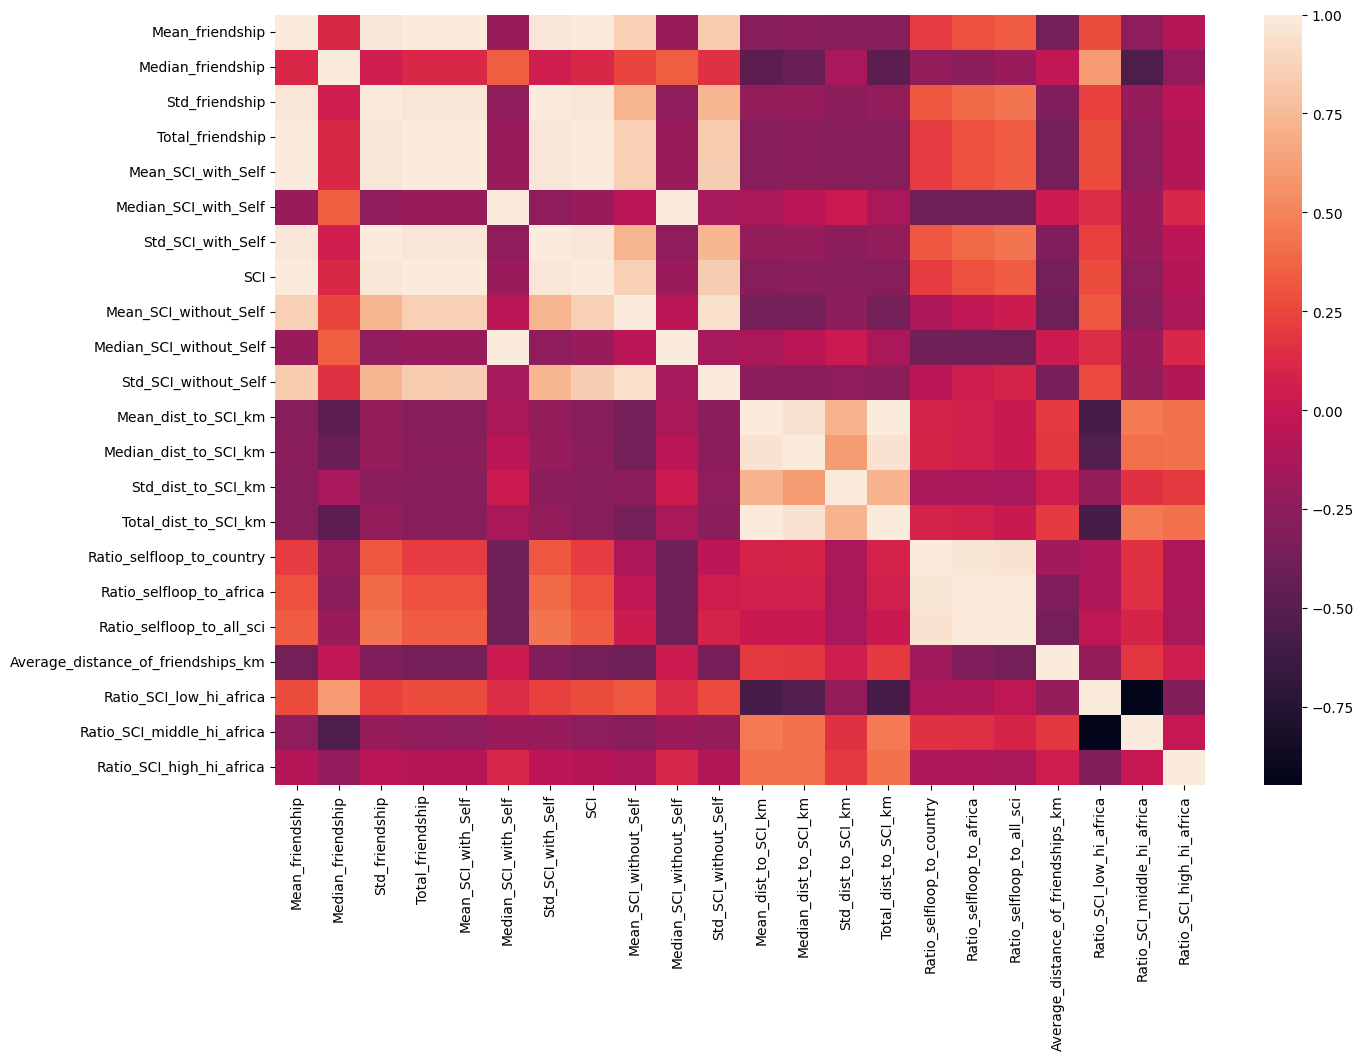

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(sci[['Mean_friendship', 'Median_friendship',
       'Std_friendship', 'Total_friendship', 'Mean_SCI_with_Self',
       'Median_SCI_with_Self', 'Std_SCI_with_Self', 'SCI',
       'Mean_SCI_without_Self', 'Median_SCI_without_Self',
       'Std_SCI_without_Self', 'Mean_dist_to_SCI_km', 'Median_dist_to_SCI_km',
       'Std_dist_to_SCI_km', 'Total_dist_to_SCI_km',
       'Ratio_selfloop_to_country', 'Ratio_selfloop_to_africa',
       'Ratio_selfloop_to_all_sci', 'Average_distance_of_friendships_km',
       'Ratio_SCI_low_hi_africa', 'Ratio_SCI_middle_hi_africa',
       'Ratio_SCI_high_hi_africa']].corr())
plt.show()

In [37]:
sci = gpd.GeoDataFrame(sci.merge(lmic, left_on='user_loc', right_on='GID_1', how='inner'))
sci = sci.to_crs("3857")

In [38]:
sci.head()

,Unnamed: 0,user_loc,Mean_friendship,Median_friendship,Std_friendship,Total_friendship,Mean_SCI_with_Self,Median_SCI_with_Self,Std_SCI_with_Self,SCI,...,perc_ever_used_internet_wght_age_15_to_49_men,perc_used_internet_past12months_wght_age_15_to_49_men,perc_owns_mobile_telephone_wght_age_15_to_49_men,perc_ever_used_internet_wght_fm_ratio,perc_used_internet_past12months_wght_fm_ratio,perc_owns_mobile_telephone_wght_fm_ratio,perc_ever_used_internet_wght_age_15_to_49_fm_ratio,perc_used_internet_past12months_wght_age_15_to_49_fm_ratio,perc_owns_mobile_telephone_wght_age_15_to_49_fm_ratio,geometry
0,0,AGO1,28899.495775,410.0,509712.459518,20518642,2610.911879,18.0,152077.386439,20858575,...,30.997955,30.536787,64.846443,0.591553,0.523263,0.631704,0.563397,0.488956,0.642984,"POLYGON ((1584013.243 -1077954.995, 1585186.97..."
1,1,AGO10,22421.997183,516.5,262283.088466,15919618,2021.547252,15.0,78400.334324,16150141,...,19.858635,18.006083,50.988591,0.531348,0.493209,0.671329,0.497260,0.461872,0.661921,"POLYGON ((1543210.095 -1826866.846, 1541039.92..."
2,2,AGO11,10280.314085,415.5,58056.367014,7299023,949.510076,17.0,17544.896216,7585636,...,58.690822,55.792060,87.310726,0.598771,0.575241,0.837705,0.596369,0.573758,0.841553,"MULTIPOLYGON (((1475620.334 -1026889.123, 1475..."
3,3,AGO12,44556.985915,659.5,831901.941286,31635460,3992.608211,17.0,248166.533095,31896947,...,27.264534,23.926652,71.388068,0.276423,0.269379,0.523240,0.265676,0.260308,0.510452,"POLYGON ((2058465.096 -1166953.443, 2059391.89..."
4,4,AGO13,42086.776056,561.0,744150.032090,29881611,3769.506822,14.0,222022.468802,30114590,...,29.224413,26.695129,55.123188,0.292975,0.241259,0.743875,0.278358,0.229512,0.744614,"POLYGON ((2224620.086 -1262368.412, 2223600.28..."


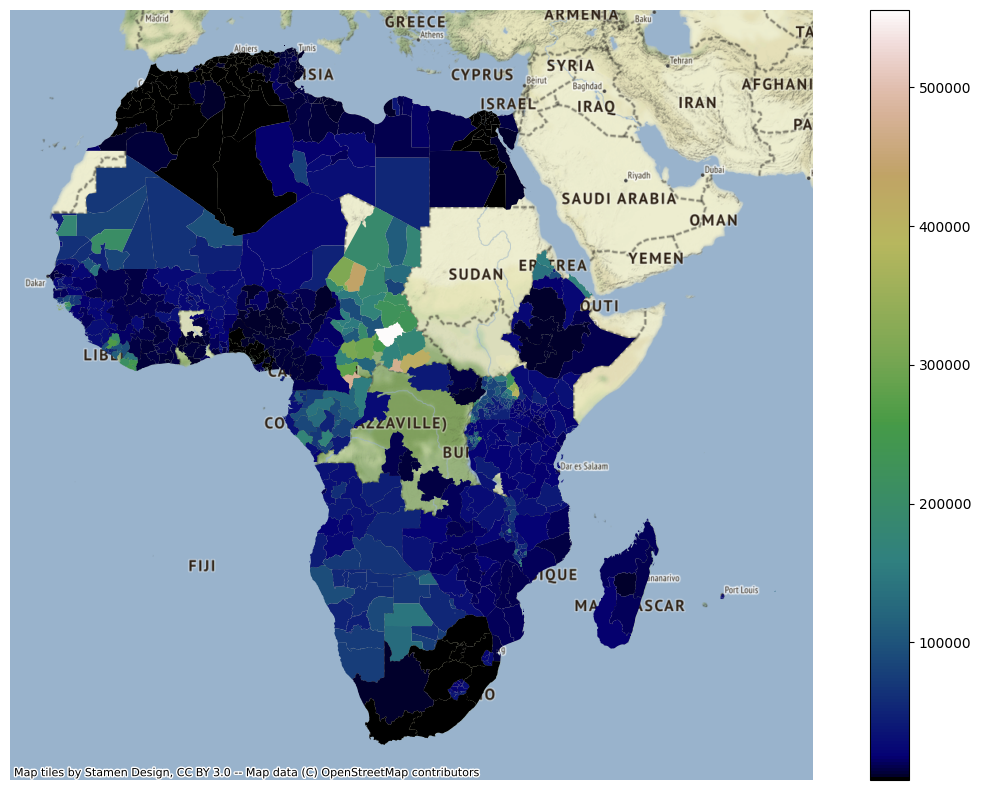

In [39]:
## All countries with data
ax= sci.plot(figsize=(15,10),column='Mean_friendship',legend=True, cmap='gist_earth')
cx.add_basemap(ax)
plt.axis('off')
plt.savefig("images/Mean_friendship.png")
plt.show()

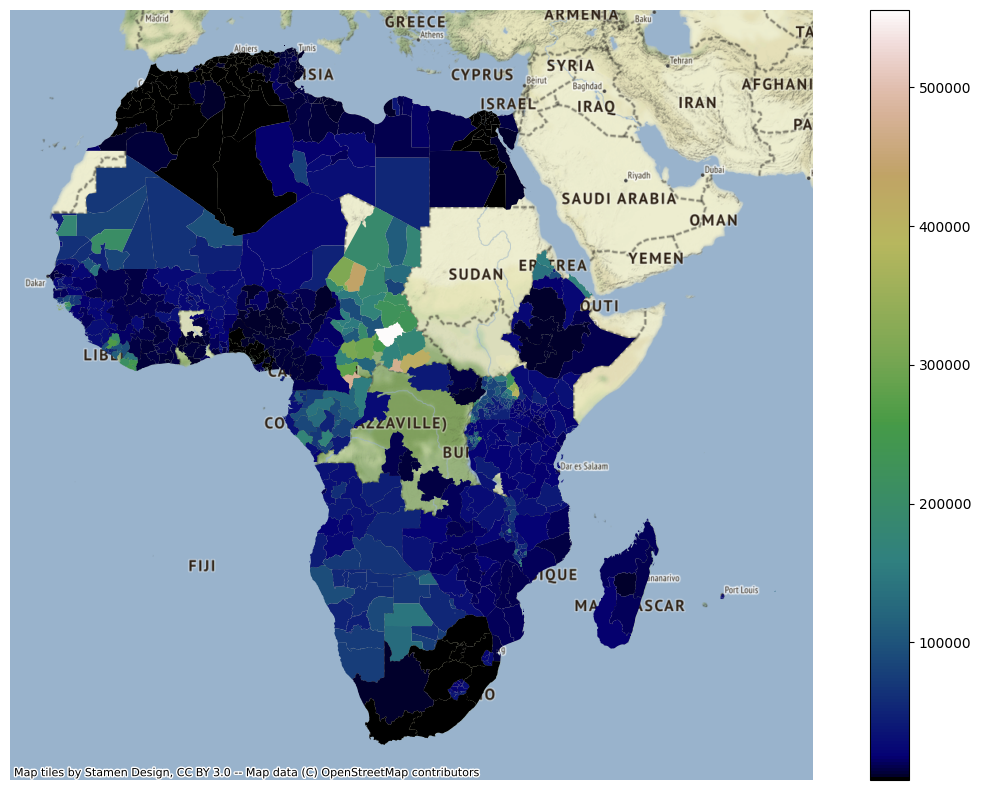

In [40]:
## All countries with data
ax= sci.plot(figsize=(15,10),column='Mean_friendship',legend=True, cmap='gist_earth')
cx.add_basemap(ax)
plt.axis('off')
plt.savefig("images/Mean_friendship.png")
plt.show()

### FaceBook data

In [29]:
selected_cols = [x for x in gadm_1.columns.tolist() if 'SCI' in x] + [x for x in gadm_1.columns.tolist() if 'FB_pntr' in x] + [x for x in gadm_1.columns.tolist() if 'connection_index' in x] 
FB_pntr_sci = gadm_1.filter(selected_cols)

In [30]:
FB_pntr_sci = FB_pntr_sci.dropna()

In [31]:
FB_pntr_sci.head()

,Mean_SCI_with_Self,Median_SCI_with_Self,Std_SCI_with_Self,SCI,Mean_SCI_without_Self,Median_SCI_without_Self,Std_SCI_without_Self,Mean_dist_to_SCI,Median_dist_to_SCI,Std_dist_to_SCI,...,FB_pntr_15to49_female,FB_pntr_15to49_male,FB_pntr_18to24_all,FB_pntr_18to24_female,FB_pntr_18to24_male,FB_pntr_18to49_all,FB_pntr_18to49_female,FB_pntr_18to49_male,Intraconnection_index,LMIC_interconnection_index
0,696.570284,24.0,10536.898519,5564900,644.215448,24.0,9441.361664,38.787583,39.158016,19.172216,...,0.628039,1.000000,0.912292,0.684815,1.000000,0.883215,0.694858,1.000000,0.075277,0.831708
1,764.617474,8.0,32983.109986,6108529,406.319980,8.0,7892.321344,37.881024,38.270044,19.005464,...,0.072651,0.201664,0.186524,0.110891,0.278089,0.137935,0.076701,0.215076,0.468664,0.476444
2,1856.071098,11.0,121721.519195,14828152,498.239609,11.0,9314.991223,37.953148,38.065188,18.968335,...,0.071729,0.165704,0.178056,0.110860,0.233101,0.120130,0.070498,0.174835,0.731596,0.248339
3,2087.346977,12.0,132412.978011,16675815,610.569604,12.0,10498.993410,37.064183,37.188574,18.767780,...,0.029812,0.090889,0.087751,0.046745,0.131175,0.061114,0.030955,0.089508,0.707527,0.277444
4,3582.800976,8.0,272274.212869,28622997,538.656485,8.0,10033.398311,37.598482,37.623396,18.876677,...,0.187963,0.489291,0.438288,0.273804,0.614466,0.353035,0.205116,0.525189,0.849674,0.141557


In [32]:
# Normalised df
FB_pntr_sci_normed = (FB_pntr_sci-FB_pntr_sci.mean())/FB_pntr_sci.std()

In [33]:
FB_pntr_sci_normed.head()

,Mean_SCI_with_Self,Median_SCI_with_Self,Std_SCI_with_Self,SCI,Mean_SCI_without_Self,Median_SCI_without_Self,Std_SCI_without_Self,Mean_dist_to_SCI,Median_dist_to_SCI,Std_dist_to_SCI,...,FB_pntr_15to49_female,FB_pntr_15to49_male,FB_pntr_18to24_all,FB_pntr_18to24_female,FB_pntr_18to24_male,FB_pntr_18to49_all,FB_pntr_18to49_female,FB_pntr_18to49_male,Intraconnection_index,LMIC_interconnection_index
0,-0.716663,0.247610,-0.678619,-0.716663,-0.638219,0.248061,-0.547535,1.954616,2.192606,1.154093,...,2.229668,3.270056,2.630457,2.002710,2.698655,2.911851,2.404672,3.126091,-1.803987,1.609771
1,-0.701610,-0.679253,-0.596332,-0.701610,-0.764765,-0.678770,-0.572584,1.759870,2.003521,1.094886,...,-0.308827,0.015689,-0.106949,-0.278343,0.105191,-0.177277,-0.316251,0.014096,0.107852,-0.223159
2,-0.460163,-0.505466,-0.271021,-0.460163,-0.715869,-0.504989,-0.549578,1.775364,1.959898,1.081703,...,-0.313038,-0.130899,-0.138888,-0.278463,-0.056431,-0.251075,-0.343555,-0.145449,1.385688,-1.400035
3,-0.409001,-0.447537,-0.231827,-0.409001,-0.656116,-0.447062,-0.530431,1.584397,1.773231,1.010494,...,-0.504630,-0.435877,-0.479494,-0.533290,-0.422600,-0.495692,-0.517613,-0.483744,1.268713,-1.249873
4,-0.078182,-0.679253,0.280898,-0.078182,-0.694370,-0.678770,-0.537961,1.699175,1.865823,1.049159,...,0.218227,1.188184,0.842641,0.369153,1.313623,0.714298,0.248990,1.243602,1.959540,-1.950961


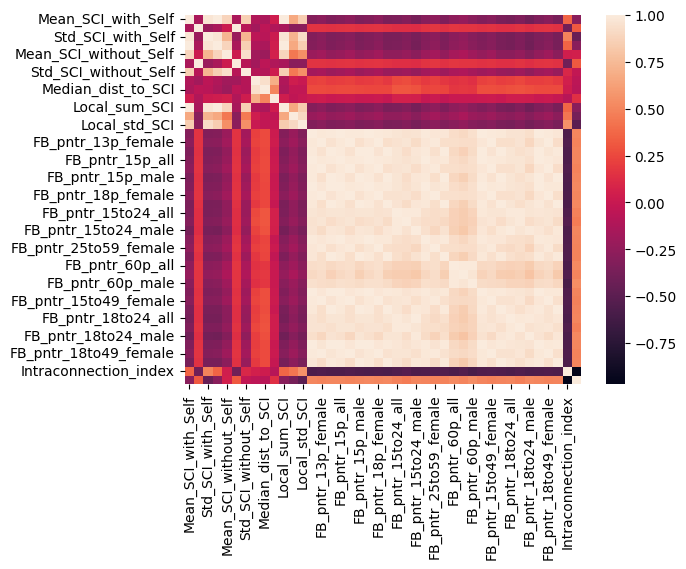

In [34]:
sns.heatmap(FB_pntr_sci.corr())
plt.show()

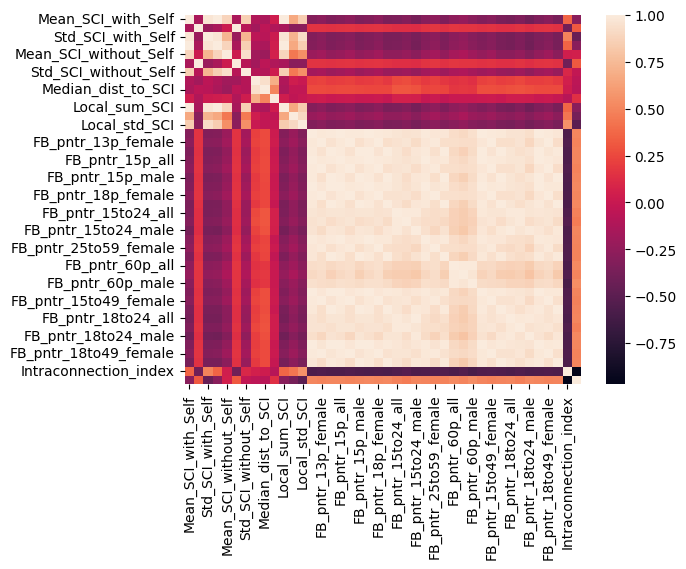

In [35]:
sns.heatmap(FB_pntr_sci_normed.corr())
plt.show()

### World Pop Data

In [5]:
wp =  pd.read_csv("external_dataset/wp.csv")

In [6]:
wp.head()

,Unnamed: 0,GID_1,Mean_of_Night_Light,Std_of_Night_Light,Mean_distance_to_major_rd_intersection,Std_distance_to_major_rd_intersection,Mean_distance_to_major_rd,Std_distance_to_major_rd,Mean_distance_to_inland_water,Std_distance_to_inland_water,Mean_built_settlement_growth,Std_built_settlement_growth
0,0,SEN1,7.176919,0.621748,3.293481,0.174721,1.573489,0.091997,3.213580,0.176993,239.832837,10.014970
1,1,SEN2,0.257264,0.157736,21.659406,3.353317,3.470620,0.548351,33.594360,4.749283,239.850495,29.213909
2,2,SEN3,0.053988,0.026250,17.241502,2.955293,5.249177,1.001454,12.854151,2.863131,239.913755,34.018264
3,3,SEN4,0.043369,0.042297,53.902970,10.556454,8.846812,2.176742,41.094880,8.812414,239.957290,44.068033
4,4,SEN5,0.097239,0.060448,22.814258,3.467939,4.644868,0.718119,9.393709,1.541813,239.925571,30.714515


In [55]:
dhs = pd.read_csv("external_dataset/dhs_health_by_sex_mobile.csv")

In [56]:
dhs.head()

,GID_1,rel_major,rel_minor,lang_major,lang_minor,middle,poorer,poorest,richer,richest,...,evangelical presbyterian,pentecotist,baha'i,jehovah's witness,jewish,mammon,pentecostal/born again/evangelical,presbyterian,salvation army,apostolic sect
0,AGO1,0.240489,0.759511,1.0,0.0,0.259511,0.298913,0.116848,0.183424,0.141304,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AGO1,0.240489,0.759511,1.0,0.0,0.259511,0.298913,0.116848,0.183424,0.141304,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AGO1,0.240489,0.759511,1.0,0.0,0.259511,0.298913,0.116848,0.183424,0.141304,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGO1,0.240489,0.759511,1.0,0.0,0.259511,0.298913,0.116848,0.183424,0.141304,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AGO1,0.240489,0.759511,1.0,0.0,0.259511,0.298913,0.116848,0.183424,0.141304,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
[c for c in dhs.GID_1.unique().tolist() if "GHA" in c]

[]

### Afrobarometer Data

In [44]:
afro_data = pd.read_csv("external_dataset/afrobarometer.csv")

In [45]:
afro_data.head()

,trpar,trtax,trgov,trlaw,trgen,trrel,trnei,tracq,mp_service,GID_1
0,2.133583,1.101359,1.500720,1.685713,0.524865,2.400156,2.119522,1.603183,0.971810,BEN1
1,2.546581,1.553177,1.878101,2.164005,0.611403,2.632019,1.969915,1.505002,1.000000,BEN2
2,1.543943,1.263010,1.631452,1.728224,0.029859,2.802408,0.929917,0.748173,0.919051,BEN3
3,2.012048,1.297439,1.459003,1.977447,0.581889,2.688714,2.124295,1.728058,0.901420,BEN4
4,1.763607,1.504161,1.536362,1.756674,0.223407,2.435927,1.507750,1.322588,1.000000,BEN5


In [46]:
afro_data = gpd.GeoDataFrame(afro_data.merge(lmic, on="GID_1", how="inner"))
afro_data = afro_data.to_crs("3857")

In [47]:
afro_data.head()

,trpar,trtax,trgov,trlaw,trgen,trrel,trnei,tracq,mp_service,GID_1,...,perc_ever_used_internet_wght_age_15_to_49_men,perc_used_internet_past12months_wght_age_15_to_49_men,perc_owns_mobile_telephone_wght_age_15_to_49_men,perc_ever_used_internet_wght_fm_ratio,perc_used_internet_past12months_wght_fm_ratio,perc_owns_mobile_telephone_wght_fm_ratio,perc_ever_used_internet_wght_age_15_to_49_fm_ratio,perc_used_internet_past12months_wght_age_15_to_49_fm_ratio,perc_owns_mobile_telephone_wght_age_15_to_49_fm_ratio,geometry
0,2.133583,1.101359,1.500720,1.685713,0.524865,2.400156,2.119522,1.603183,0.971810,BEN1,...,8.112888,7.301977,71.959572,0.247393,0.245278,0.476835,0.230509,0.229079,0.475003,"POLYGON ((302340.843 1183162.175, 301848.365 1..."
1,2.546581,1.553177,1.878101,2.164005,0.611403,2.632019,1.969915,1.505002,1.000000,BEN2,...,11.409147,10.492611,75.057718,0.423585,0.431226,0.460703,0.386294,0.387428,0.454692,"POLYGON ((152103.861 1118143.634, 152099.122 1..."
2,1.543943,1.263010,1.631452,1.728224,0.029859,2.802408,0.929917,0.748173,0.919051,BEN3,...,32.279505,30.618889,82.239758,0.445692,0.417821,0.740551,0.416547,0.387467,0.746413,"MULTIPOLYGON (((238239.062 706168.086, 238239...."
3,2.012048,1.297439,1.459003,1.977447,0.581889,2.688714,2.124295,1.728058,0.901420,BEN4,...,13.321781,12.670978,76.880469,0.472769,0.414878,0.626930,0.452362,0.398122,0.621255,"MULTIPOLYGON (((309666.679 999847.864, 309503...."
4,1.763607,1.504161,1.536362,1.756674,0.223407,2.435927,1.507750,1.322588,1.000000,BEN5,...,21.828381,19.582520,78.859619,0.155413,0.143783,0.683762,0.141410,0.131351,0.677583,"MULTIPOLYGON (((234791.730 843609.815, 232365...."


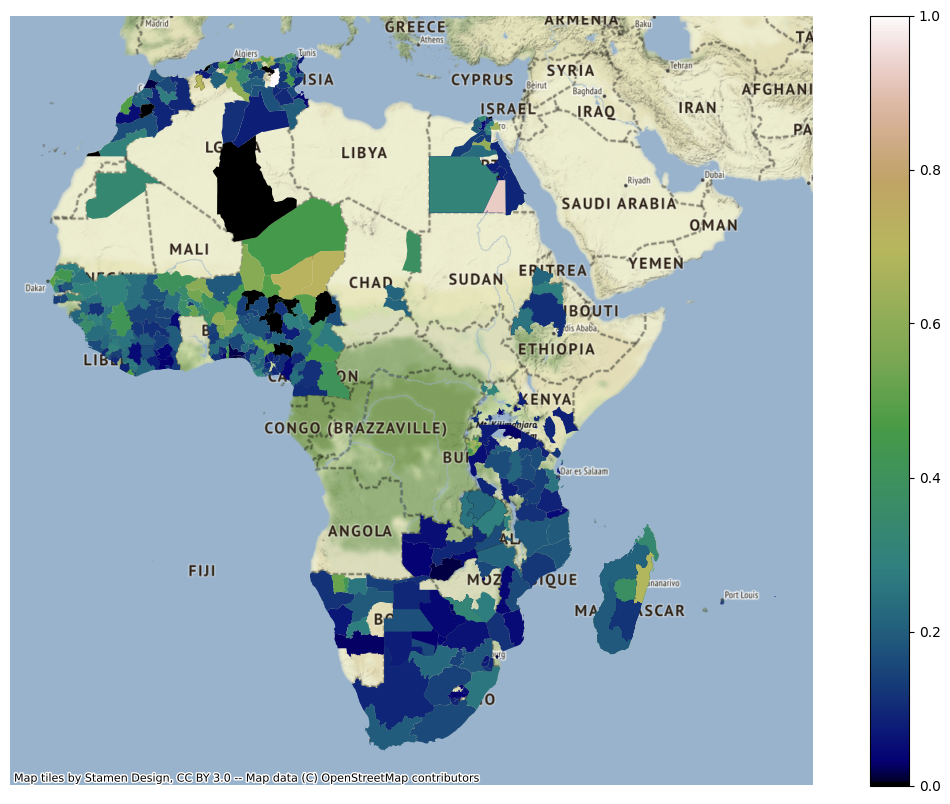

In [48]:
## All countries with data
ax= afro_data.plot(figsize=(15,10),column='trgen',legend=True, cmap='gist_earth')
cx.add_basemap(ax)
plt.axis('off')
plt.savefig("images/trgen.png")
plt.show()

In [13]:
hdi = pd.read_csv("external_dataset/hdi.csv")

In [14]:
hdi.head()

,Unnamed: 0,GID_1,HDI
0,0,SEN1,0.607
1,1,SEN2,0.589
2,2,SEN3,0.390
3,3,SEN4,0.464
4,4,SEN5,0.454


In [15]:
[d for d in hdi.GID_1.unique().tolist() if "GHA" in d]

['GHA1',
 'GHA2',
 'GHA3',
 'GHA4',
 'GHA5',
 'GHA6',
 'GHA7',
 'GHA8',
 'GHA9',
 'GHA10']